In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


# Preprocessing

In [ ]:
### Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

##Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

##Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

##One-hot Encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Model Building

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

###Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Training a Model

In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=5,
                    batch_size=128)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.8339 - loss: 0.5376 - val_accuracy: 0.9785 - val_loss: 0.0735
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9777 - loss: 0.0707 - val_accuracy: 0.9888 - val_loss: 0.0424
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9844 - loss: 0.0509 - val_accuracy: 0.9908 - val_loss: 0.0358
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.9900 - loss: 0.0332 - val_accuracy: 0.9898 - val_loss: 0.0372
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.9923 - loss: 0.0255 - val_accuracy: 0.9888 - val_loss: 0.0403


# Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9883 - loss: 0.0377
Test Accuracy: 99.02%


# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


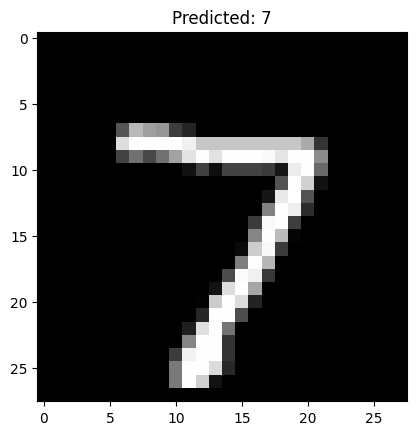

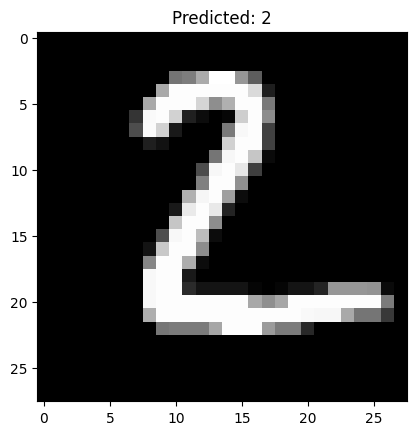

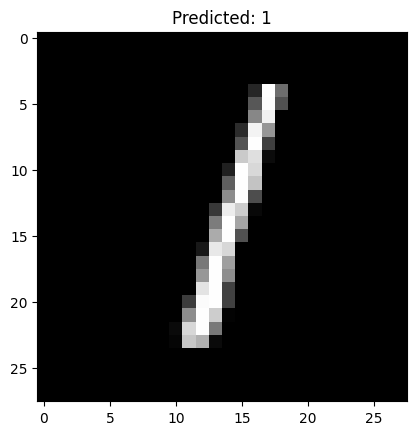

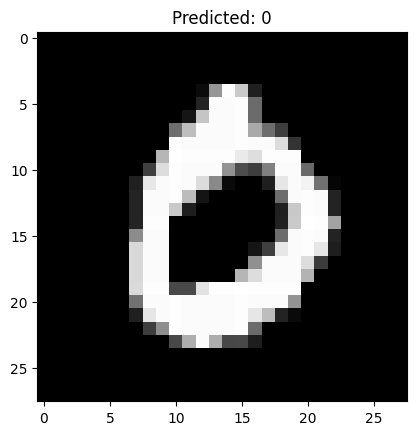

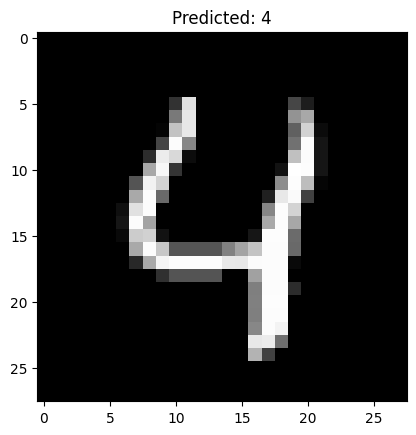

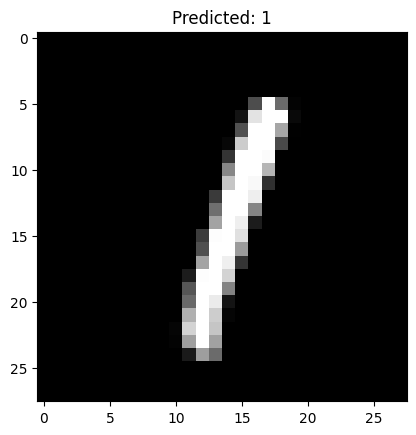

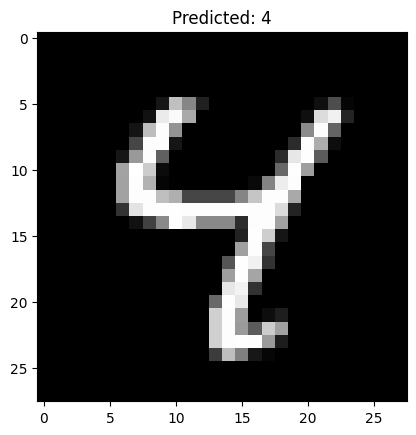

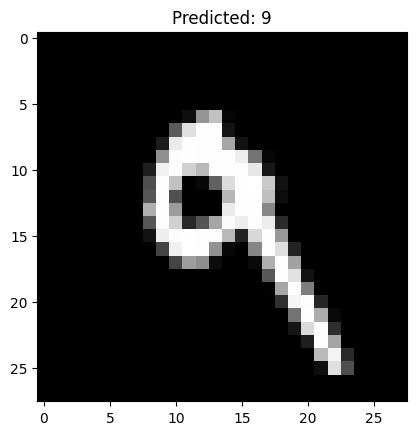

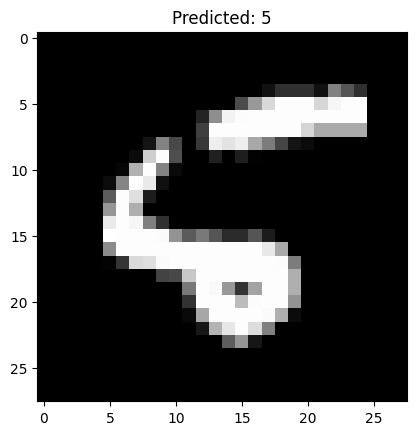

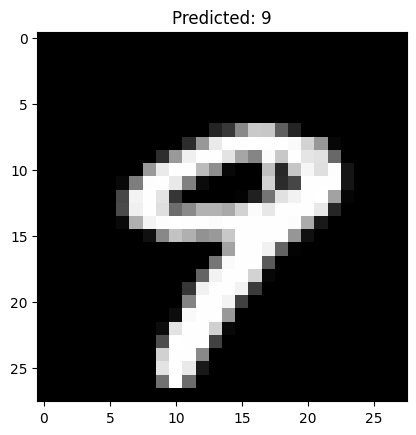

In [ ]:
predictions = model.predict(X_test[:10])

for i in range(10):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.show()
